# TP1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Partie 1 : Étude du comportement général

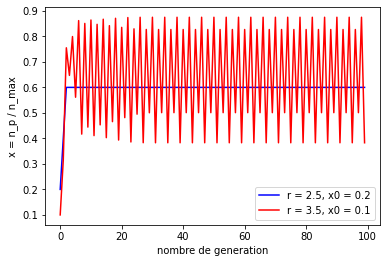

In [2]:
def Evolution(r, pmax, x0):
    xp = np.empty(pmax)
    xp[0] = x0
    for i in range(pmax - 1):
        x = xp[i]
        xp[i + 1] = r * (1 - x) * x
    
    return np.arange(0, pmax), xp

plt.plot(*Evolution(2.5, 100, 0.2), 'b', label="r = 2.5, x0 = 0.2")
plt.plot(*Evolution(3.5, 100, 0.1), 'r', label="r = 3.5, x0 = 0.1")
plt.xlabel("nombre de generation")
plt.ylabel("x = n_p / n_max")
plt.legend()
plt.show()

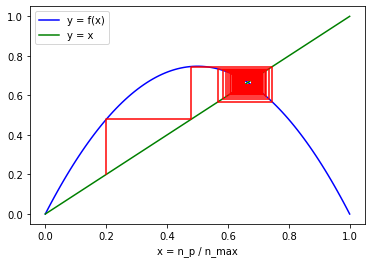

In [109]:
def Visualisation(r, pmax, x0):
    f = lambda x: r * (1 - x) * x
    x = np.linspace(0, 1, 100)
    
    plt.plot(x, f(x), 'b', label="y = f(x)")
    plt.plot(x, x, 'g', label="y = x")
    
    _x = x0
    points = []
    for i in range(pmax - 1):
        y = f(_x)
        points.append((_x, _x))
        points.append((_x, y))
        _x = y
    
    xs, ys = zip(*points)
    
    plt.plot(xs, ys, 'r')
    
    plt.xlabel("x = n_p / n_max")
    plt.legend()
    plt.show()

Visualisation(2.99, 100, 0.2)        

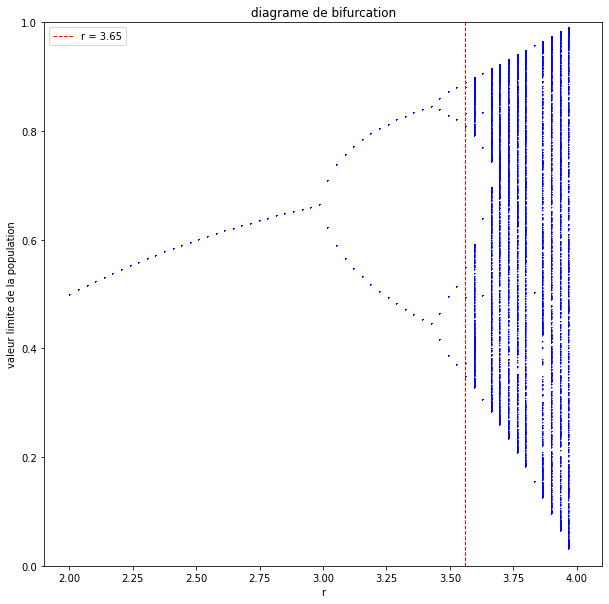

In [25]:
def FigureR(r_debut, r_fin, n_point):
    r0 = np.linspace(r_debut, r_fin, n_point)
    x3, x3p = np.ones(100), np.ones(1000)
    
    plt.figure(figsize=(10, 10))
    plt.ylim(0, 1)
    
    for i, r in enumerate(r0):
        _, xp = Evolution(r, 2000, 0.5)
        if r < 3:
            plt.plot(x3 * r, xp[-100:], 'b+', markersize=1)
        else:
            plt.plot(x3p * r, xp[-1000:], 'b+', markersize=1)

    plt.ylabel("valeur limite de la population")
    plt.xlabel("r")
    plt.title("diagrame de bifurcation")

FigureR(2, 4, 60)
plt.plot([3.56, 3.56], [0, 1], 'r--', label='r = 3.65', linewidth=1)
plt.legend()
plt.show()

5) On peut considérer le système comme chaotique pour r > 3.65 (droite rouge) car à partir de cette valeur les valeurs-limites de population ne suivent plus une évolution simple (oscillation d'ordre 2^n, d'où l'idée de "doublement de période").

On peut parler de "chaos déterministe" car ces suites et donc leur limite sont bien déterministes, mais ne semble plus suivre de lois simples.

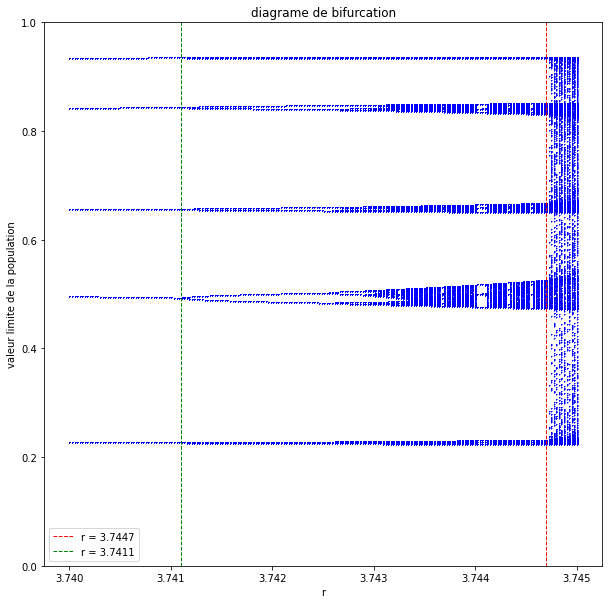

In [37]:
FigureR(3.74, 3.745, 200)
plt.plot([3.7447, 3.7447], [0, 1], 'r--', label='r = 3.7447', linewidth=1)
plt.plot([3.7411, 3.7411], [0, 1], 'g--', label='r = 3.7411', linewidth=1)
plt.legend()
plt.show()

6) On peut voir que pour r > 3.7447 (ligne rouge) les populations oscillent entre 0.2 et quasiment 1 de manière complètement chaotique. Avant cela on peut observer d'abord 5 pics (point fixe de f⁵) puis peu à peu plus certains pics se dédoublent (à r = 7411 représenté par la ligne verte par exemple).

# Partie 2 : sensibilité aux conditions initiales

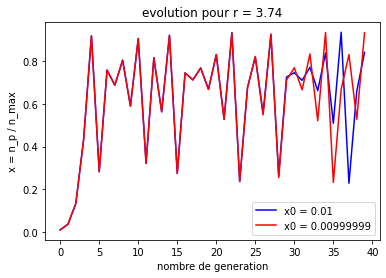

In [104]:
x1, xp1 = Evolution(3.74, 40, 0.01)
_, xp2 = Evolution(3.74, 40, 0.00999999)

plt.plot(x1, xp1, 'b', label="x0 = 0.01")
plt.plot(x1, xp2, 'r', label="x0 = 0.00999999")
plt.xlabel("nombre de generation")
plt.ylabel("x = n_p / n_max")
plt.title("evolution pour r = 3.74")
plt.legend()
plt.show()

7) On peut voir que pour cette valeur de r une variation très petite (0.00001%) cause une différence notable d'évolution des populations au bout de 25 générations.

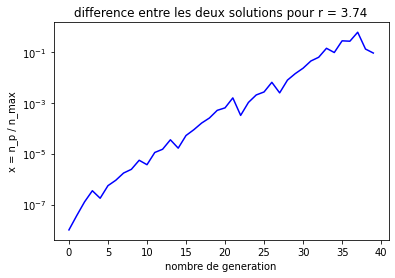

In [105]:
plt.plot(x1, np.absolute(xp1 - xp2), 'b')
plt.xlabel("nombre de generation")
plt.ylabel("x = n_p / n_max")
plt.title("difference entre les deux solutions pour r = 3.74")
plt.semilogy()
plt.show()

8) On observe que la différence lors des premières générations augmente de manière explonetielle (linéaire en semi-log) mais reste très faible (10⁻⁷ à 10⁻³).

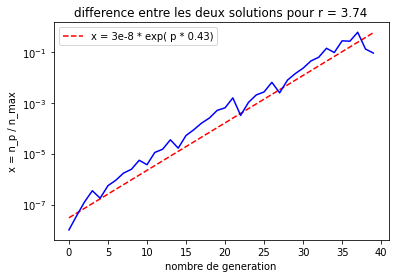

In [106]:
coef, A = 0.43, 3e-8

plt.plot(x1, A * np.exp(coef * x1), 'r--', label="x = 3e-8 * exp( p * 0.43)")
plt.plot(x1, np.absolute(xp1 - xp2), 'b')
plt.xlabel("nombre de generation")
plt.ylabel("x = n_p / n_max")
plt.title("difference entre les deux solutions pour r = 3.74")
plt.semilogy()
plt.legend()
plt.show()

9) On trouve donc un exposant de Lyapounov de 0.43.

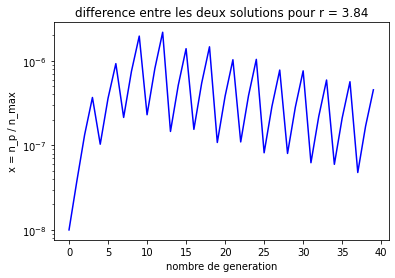

In [102]:
x1, xp1 = Evolution(3.84, 40, 0.01)
_, xp2 = Evolution(3.84, 40, 0.00999999)

plt.plot(x1, np.absolute(xp1 - xp2), 'b')
plt.xlabel("nombre de generation")
plt.ylabel("x = n_p / n_max")
plt.title("difference entre les deux solutions pour r = 3.84")
plt.semilogy()
plt.show()

10) On peut voir que pour r = 3.84 on ne peut pas définir d'exposant de Lyapounov car l'erreur de grimpe pas au-delà d'une valeur fixe.

# Partie 3 : Dimensionnalité de l'espace des populations

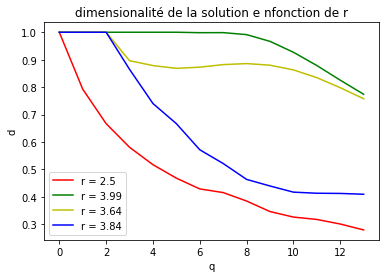

In [108]:
def dimensionalité(r, qmax=15):
    _, xp = Evolution(r, 2000, 0.05)
    
    d = np.empty(qmax - 1)
    for q in range(1, qmax):
        m = 2**q
        
        boxes, n_box = [], 0
        for x in xp:
            k = int(x * m) # l = 1 / m, k est l'indice du segment
            if k not in boxes: # pour ne pas compter un segment plusieur fois
                boxes.append(k) # marquer le segment comme deja compté
                n_box += 1
        
        d[q - 1] = np.log(n_box) / np.log(m) # l = 1 / m
    
    return d

plt.plot(dimensionalité(2.5), 'r', label="r = 2.5")
plt.plot(dimensionalité(3.99), 'g', label="r = 3.99")
plt.plot(dimensionalité(3.64), 'y', label="r = 3.64")
plt.plot(dimensionalité(3.84), 'b', label="r = 3.84")
plt.title("dimensionalité de la solution e nfonction de r")
plt.xlabel("q")
plt.ylabel("d")
plt.legend()
plt.show()

11) On peut voir que pour les valeurs donnant des solutions chaotiques, on a bien une dimensionnalité définie (valeur plateau avant la dercoissance dû à l'augmentation du nombre de segments par rapport au nombre de générations). Pour r = 3.99 on a d avoir 1, les valeurs couvre donc tout [0, 1]. Pour r = 3.64 on a d avoir 0.9 ce qui correspond donc à un fractale dans [0, 1].